# core

> random geometric graph class

In [ ]:
#| hide
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
import functools
import collections
from fastcore.basics import patch
from geography.points import Points

In [ ]:
#| export
class RGG:
    """random geometric graph"""
    def __init__(self,n:int, # average number of points
                 r:float,  # connection radius
                 d:int=2, # dimension
                 law = "binomial", # either poisson or binomial
                 shape = None): # convex polytope
        self.V = Points(n=n,d=d, law=law, shape=shape)
        self.n = self.V.n
        self.r = r
    
    @functools.cached_property
    def adj(self):
        mask = self.V.distance_matrix < self.r
        return {i: [j for j,v in enumerate(row) if v and j != i] for i,row in enumerate(mask)}


In [ ]:
from scipy.spatial import ConvexHull
import seaborn.objects as so

In [ ]:
rgg = RGG(100,0.05, law="poisson", shape=ConvexHull(np.random.default_rng().uniform(0,1,(6,2))))
rgg.V.distance_matrix.shape # poisson number 

(105, 105)

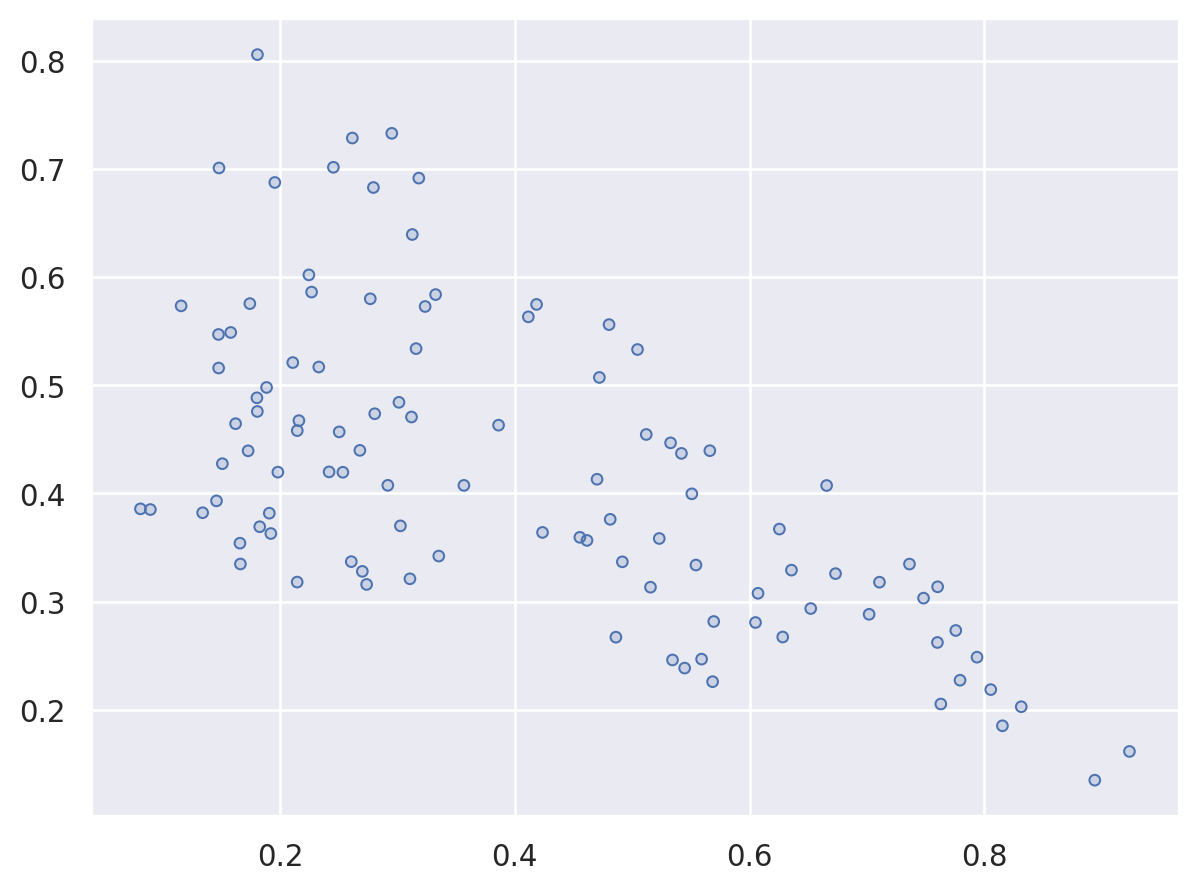

In [ ]:

p = so.Plot(x=rgg.V.points[:,0], y=rgg.V.points[:,1])
p.add(so.Dots())

In [ ]:
rgg.adj

{0: [23, 30, 43, 72],
 1: [9],
 2: [34, 42, 83],
 3: [8],
 4: [50, 71, 85, 88, 90],
 5: [20, 44, 49, 50, 73, 101],
 6: [87, 90],
 7: [33, 76, 86, 89],
 8: [3],
 9: [1, 77, 94],
 10: [36, 55, 66, 92, 99],
 11: [],
 12: [13, 27, 82],
 13: [12, 67],
 14: [16, 45, 57, 92],
 15: [25, 52, 98],
 16: [14, 45, 57],
 17: [60],
 18: [24, 47, 65, 68],
 19: [58, 91],
 20: [5, 44, 49, 61, 69, 73],
 21: [22, 26, 44, 69, 93, 103],
 22: [21, 26, 46, 93, 103],
 23: [0, 30, 43, 72],
 24: [18, 47, 65, 68],
 25: [15, 52, 86, 98],
 26: [21, 22, 31, 84],
 27: [12, 82],
 28: [],
 29: [62],
 30: [0, 23, 43, 48, 95],
 31: [26, 84],
 32: [61, 73, 100],
 33: [7, 76, 86, 98],
 34: [2, 42, 59, 83],
 35: [],
 36: [10, 55, 66, 96, 99],
 37: [43],
 38: [80, 89],
 39: [],
 40: [76, 89],
 41: [78],
 42: [2, 34, 95],
 43: [0, 23, 30, 37, 95],
 44: [5, 20, 21, 61, 69, 73, 93, 101],
 45: [14, 16, 57, 92],
 46: [22, 102, 103],
 47: [18, 24],
 48: [30, 53, 95],
 49: [5, 20, 50, 61, 73],
 50: [4, 5, 49, 90, 101],
 51: [],
 52

In [ ]:
#|export
@patch
def n_comp(self:RGG):
    def dfs(gr,s):
        for v in gr[s]:
            if v not in self.parent:
                self.parent[v]=s
                dfs(gr,v)
                self.topo.append(v)
    self.parent = {}
    self.topo=[]
    count = 0
    for i in range(self.n):
        if i not in self.parent:
            count+=1
            self.parent[i]=None
            dfs(self.adj,i)
            self.topo.append(i)
    return count

In [ ]:
rgg.n_comp()

16

In [ ]:
#|export
@patch
def degree_distribution(self:RGG):
    dgr=collections.Counter([len(v) for _,v in self.adj.items()])
    return np.array(list(dgr.items()))

In [ ]:
d_np = rgg.degree_distribution()
d_np

array([[ 4, 20],
       [ 1, 15],
       [ 3, 18],
       [ 5, 19],
       [ 6,  5],
       [ 2, 19],
       [ 0,  6],
       [ 8,  3]])

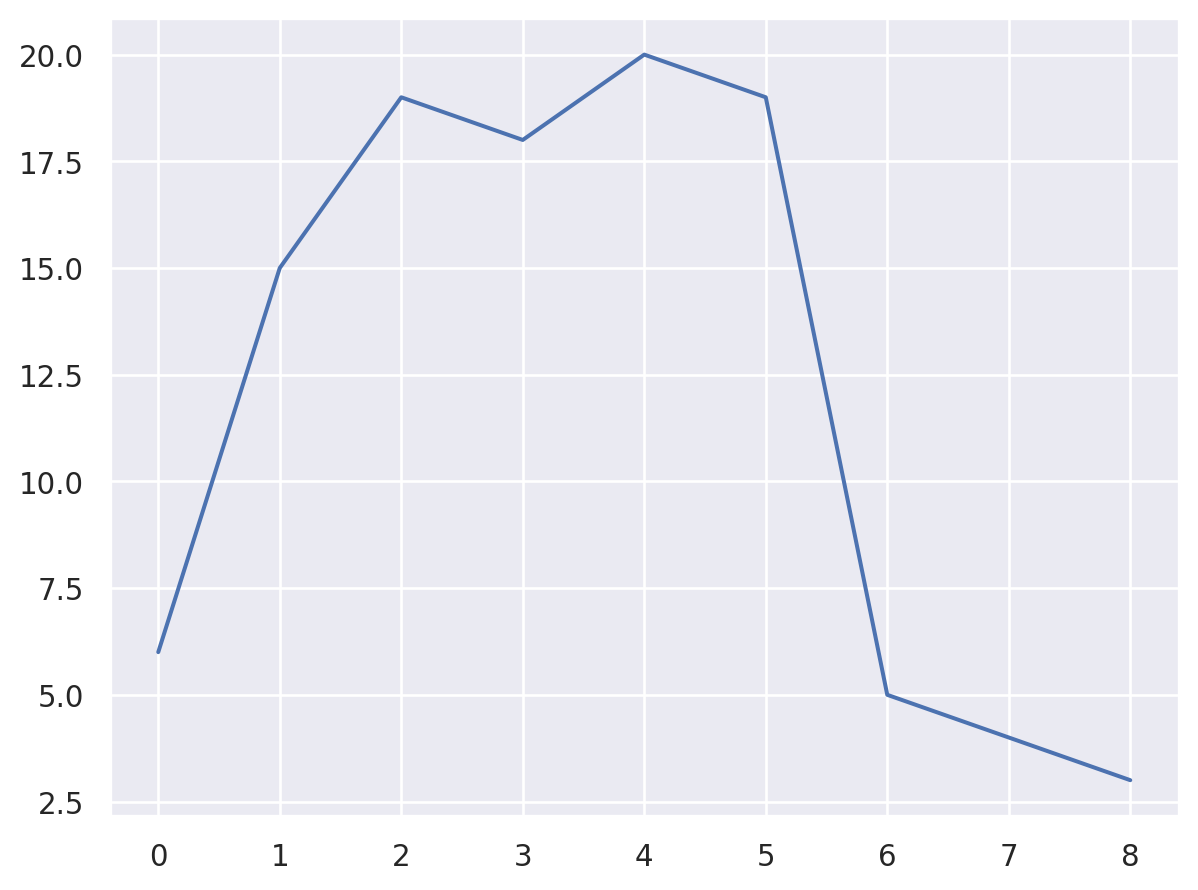

In [ ]:
(
    so.Plot(x=d_np[:,0], y=d_np[:,1])
    .add(so.Line())
)

In [ ]:
#|export
@patch
def cyclic(self:RGG):
    for k, lst in self.adj.items():
        for v in lst:
            if k != self.parent[v] and v!=self.parent[k]: 
                return True
    return False

In [ ]:
rgg.cyclic()

True

In [ ]:
#|export
@patch
def n_tri(self:RGG):
    A = (self.V.distance_matrix<=self.r).astype(np.int64)
    np.fill_diagonal(A,0)
    return np.trace(np.linalg.matrix_power(A,3))//6

In [ ]:
rgg.n_tri()

94

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()